In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cases = pd.read_excel('owid-covid-data.xlsx')
cases = cases.iloc[91610:92123]
mob = pd.read_csv('applemobilitytrends-2021-06-18.csv')
mob.interpolate(method ='linear', limit_direction ='forward')
mob1 = mob[mob.columns[16:]]
mob1.iloc[147]
USA1 = mob1.iloc[147]
USA1

In [ ]:
USA1


In [8]:
df =cases[['total_cases','new_cases','total_deaths','new_deaths','positive_rate','total_vaccinations','people_vaccinated','new_vaccinations','date']]
df =df.set_index('date')

In [9]:
result = pd.concat([df, USA1], axis=1)

In [10]:
result = result.drop('2020-01-22')
result = result.drop('2021-06-18')
result.rename(columns = {"147": "Mobility"}, inplace=True)
result.columns.values[8] = 'Mobility'
result

,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,people_vaccinated,new_vaccinations,Mobility
2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,103.29
2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,113.06
2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,101.88
2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,81.35
2020-01-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,97.56
...,...,...,...,...,...,...,...,...,...
2021-06-13,33462003.0,4775.0,599776.0,111.0,0.020,309322545.0,173840483.0,1209817.0,83.26
2021-06-14,33474734.0,12731.0,599946.0,170.0,0.021,310645827.0,174234573.0,1323282.0,87.58
2021-06-15,33486038.0,11304.0,600285.0,339.0,0.024,311886674.0,174674144.0,1240847.0,91.74
2021-06-16,33498468.0,12430.0,600653.0,368.0,NaN,312915170.0,175053401.0,1028496.0,93.21


In [11]:
result.corr()

,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,people_vaccinated,new_vaccinations,Mobility
total_cases,1.000000,0.310244,0.990895,0.163383,-0.379791,0.901854,0.919619,0.331653,0.189783
new_cases,0.310244,1.000000,0.220055,0.716163,0.332021,-0.785775,-0.800477,-0.307487,-0.305814
total_deaths,0.990895,0.220055,1.000000,0.116485,-0.485700,0.892847,0.913001,0.380821,0.513905
new_deaths,0.163383,0.716163,0.116485,1.000000,0.444969,-0.809889,-0.822737,-0.400280,-0.393864
positive_rate,-0.379791,0.332021,-0.485700,0.444969,1.000000,-0.824396,-0.836800,-0.298089,-0.561617
total_vaccinations,0.901854,-0.785775,0.892847,-0.809889,-0.824396,1.000000,0.997357,0.147370,0.917822
people_vaccinated,0.919619,-0.800477,0.913001,-0.822737,-0.836800,0.997357,1.000000,0.192458,0.906456
new_vaccinations,0.331653,-0.307487,0.380821,-0.400280,-0.298089,0.147370,0.192458,1.000000,0.133324
Mobility,0.189783,-0.305814,0.513905,-0.393864,-0.561617,0.917822,0.906456,0.133324,1.000000


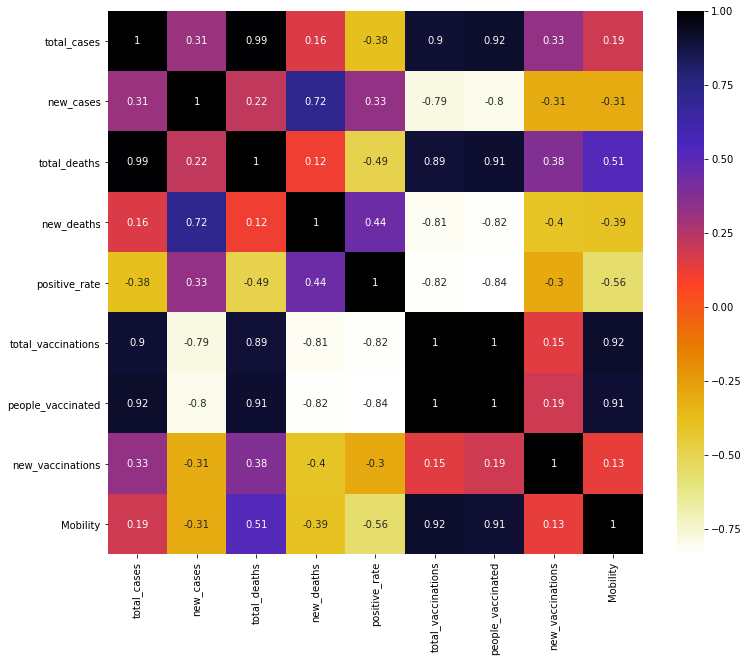

In [12]:

import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = result.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

knn

KeyError: "[('total_cases', 'total_deaths', 'total_vaccinations', 'new_vaccinated')] not found in axis"

In [79]:
corr_features

{'new_deaths', 'people_vaccinated', 'total_deaths', 'total_vaccinations'}

In [84]:
result = result.drop(corr_features,axis=1)

C:\Users\Rutvik\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


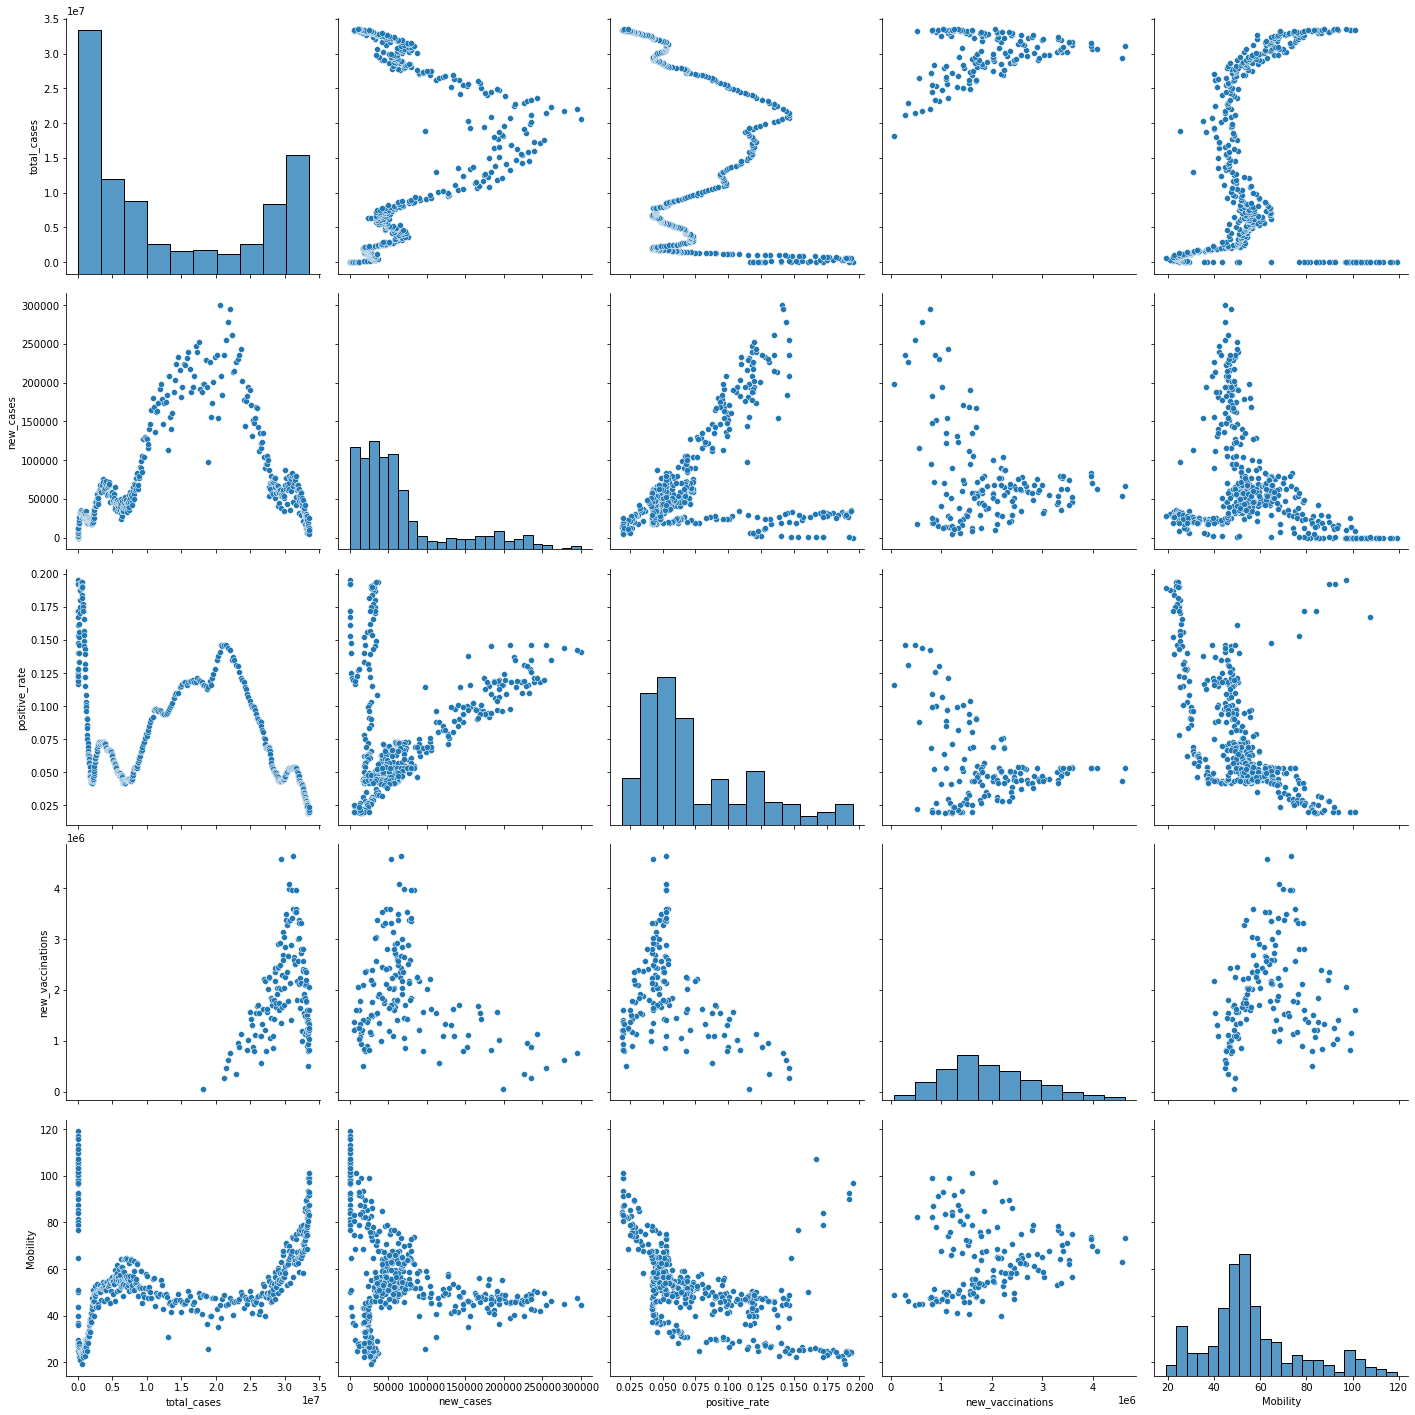

In [86]:
sns.pairplot(result,size=4)

In [87]:
result

,total_cases,new_cases,positive_rate,new_vaccinations,Mobility
2020-01-23,1.0,0.0,NaN,NaN,103.29
2020-01-24,2.0,1.0,NaN,NaN,113.06
2020-01-25,2.0,0.0,NaN,NaN,101.88
2020-01-26,5.0,3.0,NaN,NaN,81.35
2020-01-27,5.0,0.0,NaN,NaN,97.56
...,...,...,...,...,...
2021-06-13,33462003.0,4775.0,0.020,1209817.0,83.26
2021-06-14,33474734.0,12731.0,0.021,1323282.0,87.58
2021-06-15,33486038.0,11304.0,0.024,1240847.0,91.74
2021-06-16,33498468.0,12430.0,NaN,1028496.0,93.21


In [ ]:
result